<a href="https://colab.research.google.com/github/RAGISHIVANAND/DEEP_LEARNING/blob/main/RNN_KERAS_SUNSPOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [11]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation= activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model
demo_model = create_RNN(2, 1, (3,1), activation=['linear','linear'])

In [12]:
#parameter split_percent defines the ratios of training examples

def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine= 'python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0,1))
    data=scaler.fit_transform(data).flatten()
    n=len(data)

    #point for splitting data into train and test

    split = int(n*split_percent)
    train_data=data[range(split)]
    test_data=data[split:]
    return train_data, test_data, data
sunspots_url='https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [13]:
#prepare the input X and target Y
def get_XY(dat, time_steps):
    #Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]

    #prepare X
    rows_X = len(Y)
    X = dat[range(time_steps*rows_X)]
    X = np.reshape(X, (rows_X, time_steps, 1))
    print(X)
    print(Y)
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

[[[0.22852638]
  [0.24665089]
  [0.2758077 ]
  ...
  [0.29747832]
  [0.6249015 ]
  [0.33569738]]

 [[0.28881007]
  [0.29905435]
  [0.3514578 ]
  ...
  [0.2588652 ]
  [0.24940896]
  [0.2970843 ]]

 [[0.2758077 ]
  [0.1713948 ]
  [0.17848699]
  ...
  [0.09141055]
  [0.11229314]
  [0.17336485]]

 ...

 [[0.04846336]
  [0.08747045]
  [0.03979511]
  ...
  [0.01182033]
  [0.00236407]
  [0.00118203]]

 [[0.01339637]
  [0.03073286]
  [0.01694247]
  ...
  [0.02245863]
  [0.03427896]
  [0.06067769]]

 [[0.07446808]
  [0.08077226]
  [0.09101655]
  ...
  [0.20961386]
  [0.25295505]
  [0.24231677]]]
[0.28881007 0.2758077  0.13790385 0.17336485 0.         0.04018912
 0.04925138 0.05555555 0.14814813 0.19030732 0.2651694  0.2758077
 0.17257681 0.22261623 0.23522457 0.09456264 0.04728132 0.10795902
 0.2107959  0.29117414 0.40977144 0.14184396 0.3975571  0.21513
 0.18439715 0.01733648 0.08550039 0.17730495 0.6985815  0.4519306
 0.2758077  0.38888887 0.21276595 0.11032309 0.05122143 0.02561072
 0.146572

In [14]:
model = create_RNN(hidden_units=3, dense_units = 1, input_shape=(time_steps,1), activation=['tanh','tanh'])

model.fit(trainX, trainY, epochs=20, batch_size=1, verbose = 2)

Epoch 1/20
187/187 - 1s - loss: 0.1670 - 1s/epoch - 7ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0479 - 428ms/epoch - 2ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0293 - 428ms/epoch - 2ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0241 - 397ms/epoch - 2ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0207 - 400ms/epoch - 2ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0185 - 445ms/epoch - 2ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0157 - 414ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0134 - 434ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0114 - 419ms/epoch - 2ms/step
Epoch 10/20
187/187 - 1s - loss: 0.0102 - 668ms/epoch - 4ms/step
Epoch 11/20
187/187 - 1s - loss: 0.0091 - 631ms/epoch - 3ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0084 - 837ms/epoch - 4ms/step
Epoch 13/20
187/187 - 1s - loss: 0.0077 - 671ms/epoch - 4ms/step
Epoch 14/20
187/187 - 1s - loss: 0.0072 - 669ms/epoch - 4ms/step
Epoch 15/20
187/187 - 1s - loss: 0.0067 - 704ms/epoch - 4ms/step
Epoch 16/20
187/187 - 1s - loss: 0.00

In [15]:
def print_error(trainY, testY, train_predict, test_predict):
    #error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))

    #print RMSE
    print('Train RMSE: %.3f RMSE'%(train_rmse))
    print('Test RMSE: %.3f RMSE'%(test_rmse))

#make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

#mean squre error
print_error(trainY, testY, train_predict, test_predict)

2/2 [==============================] - 0s 10ms/step
Train RMSE: 0.072 RMSE
Test RMSE: 0.116 RMSE


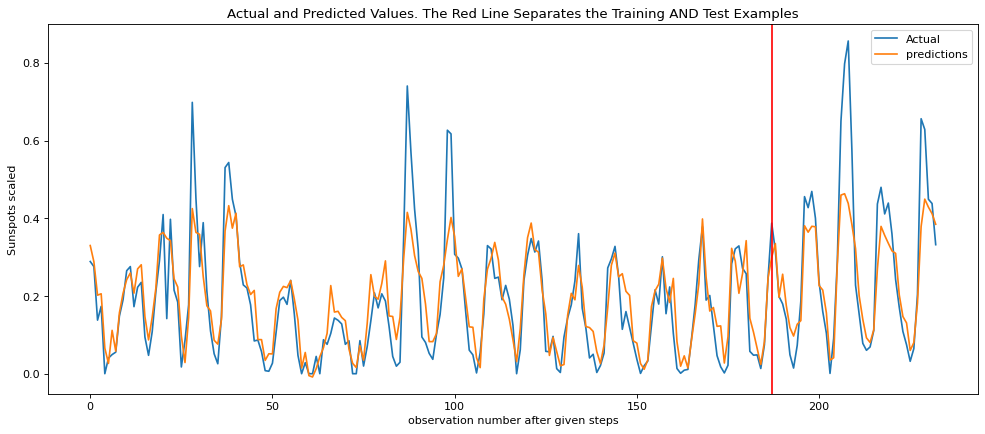

In [17]:
#plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15,6),dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'predictions'])
    plt.xlabel('observation number after given steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates the Training AND Test Examples')
plot_result(trainY, testY, train_predict, test_predict)